# <span style="color:red">  NOAA National Data Buoy Center   </span>

<img style="float: right;" src="DataSetSources.png" width="500">

## <span style="color:blue">  Project Decription: Create a surf forecast model using NOAA buoy data  </span>

## <span style="color:blue">  Links to Data: </span>

### [Edisto Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41004)

### [ENE Nassau Offshore Data](https://www.ndbc.noaa.gov/station_history.php?station=41047)

## <span style="color:blue">  Author: </span>

### [*Evan Tanner*](https://github.com/surfevant)

## <span style="color:blue">  Bash Script for Transforming Raw Data into CSV Format: </span>

### <span style="color:teal"> 1. Navigate into the raw-data directory and execute extractData.sh script </span>

###  `cd DataSets/raw-data`

###  `./extractData.sh`

<img style="float: left;" src="BashScript.png" width="450">

In [1]:
#import Libraries
import os
import pandas as pd
import numpy as np
from IPython.display import display, HTML

#will have to change depending on relative os path
os.chdir('/home/loki/Desktop/FinalTest/Data-Mining-Project/DataSets')

#dataframes for feature extraction (need to clean)
nsDf = pd.read_csv('Edisto.csv')
osDf = pd.read_csv('Bahamas.csv')

#set data types for columns
nsDf = nsDf.apply(pd.to_numeric)
osDf = osDf.apply(pd.to_numeric)

#Dropping the errors(99,999,9999), need python for NaNs
nsDf = nsDf.replace(99,np.NaN)
nsDf = nsDf.replace(999,np.NaN)
nsDf = nsDf.replace(9999,np.NaN)

osDf = osDf.replace(99,np.NaN)
osDf = osDf.replace(999,np.NaN)
osDf = osDf.replace(9999,np.NaN)

In [2]:
#check data was loaded for both sets
print("Nearshore: ")
display(nsDf.head(3))
print("Offshore:")
display(osDf.head(3))

Nearshore: 


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,18.0,4.9,7.3,1.25,10.81,5.21,85.0,1027.7,11.3,23.4,3.5
1,2015,1,1,0,50,17.0,5.1,7.2,1.21,6.25,5.09,69.0,1027.9,11.4,23.2,3.3
2,2015,1,1,1,50,2.0,5.0,6.6,1.21,10.81,5.39,76.0,1028.2,11.3,22.9,1.8


Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
0,2014,12,31,23,50,97.0,1.8,2.7,1.24,8.33,5.75,4.0,1022.1,23.6,25.4,19.6
1,2015,1,1,0,50,94.0,1.6,2.3,1.29,7.14,5.89,100.0,1022.2,23.8,25.4,19.9
2,2015,1,1,1,50,168.0,0.1,0.4,1.22,8.33,5.96,11.0,1022.4,23.9,25.4,19.6


In [3]:
#dimensions of Dataframes
print("Nearshore Shape: " + str(nsDf.shape))
print("Offshore Shape: "+ str(osDf.shape))

#data types same for nearshore and offshore
print("\n Data Types:\n")
display(nsDf.dtypes)

Nearshore Shape: (8743, 16)
Offshore Shape: (8728, 16)

 Data Types:



YY             int64
MM             int64
DD             int64
hh             int64
mm             int64
WDIR_degt    float64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt     float64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

In [4]:
import seaborn as sns
#remove unnecessary data
nsStats = nsDf.drop(columns=['YY','MM', 'DD','hh','mm'])
osStats = osDf.drop(columns=['YY','MM', 'DD','hh','mm'])

#output of dataframe statistics
print("Nearshore Dataframe Stats:")
display(nsStats.describe())
print("Offshore Dataframe Stats:")
display(osStats.describe())

Nearshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8726.000000,8743.000000,8743.000000,8737.000000,8737.000000,8737.000000,8661.000000,8743.000000,8743.000000,8741.000000,8740.000000
mean,158.480862,6.806394,8.361867,1.332740,7.308141,5.118455,125.692068,1017.591799,22.001258,24.684521,17.177071
std,103.661669,3.155170,3.781697,0.637057,2.006430,0.817716,62.420257,5.922055,5.791476,3.220459,7.174560
min,1.000000,0.000000,0.100000,0.270000,2.740000,3.000000,1.000000,996.100000,-1.000000,13.400000,-9.100000
25%,54.000000,4.500000,5.600000,0.880000,5.560000,4.490000,85.000000,1013.700000,19.200000,21.900000,13.500000
50%,178.000000,6.600000,8.000000,1.170000,7.140000,5.000000,116.000000,1017.300000,23.400000,24.900000,19.300000
75%,235.000000,8.900000,10.900000,1.620000,9.090000,5.640000,150.000000,1021.300000,26.600000,27.700000,22.700000
max,360.000000,17.800000,22.800000,4.870000,14.810000,8.720000,359.000000,1034.700000,29.600000,31.400000,26.500000


Offshore Dataframe Stats:


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
count,8689.000000,8725.000000,8724.000000,8719.000000,8719.00000,8719.000000,8670.000000,8727.000000,8725.000000,8724.000000,8723.000000
mean,151.436529,5.641937,6.982932,1.625986,8.81651,6.146150,114.966782,1018.190867,25.293318,26.523705,20.513562
std,84.730175,2.808128,3.313301,0.826906,1.89357,0.944327,86.015598,4.600063,2.738242,2.354880,3.702322
min,1.000000,0.000000,0.100000,0.450000,3.57000,4.000000,1.000000,986.300000,16.400000,21.900000,6.100000
25%,85.000000,3.600000,4.600000,1.080000,7.69000,5.470000,60.000000,1015.800000,23.500000,24.700000,18.700000
50%,140.000000,5.500000,6.600000,1.430000,8.33000,6.050000,100.000000,1018.400000,25.100000,25.900000,21.500000
75%,209.000000,7.500000,9.100000,1.970000,10.00000,6.700000,128.000000,1021.200000,28.000000,28.900000,23.300000
max,360.000000,19.300000,25.000000,7.560000,16.00000,11.060000,360.000000,1029.400000,31.000000,32.400000,26.000000


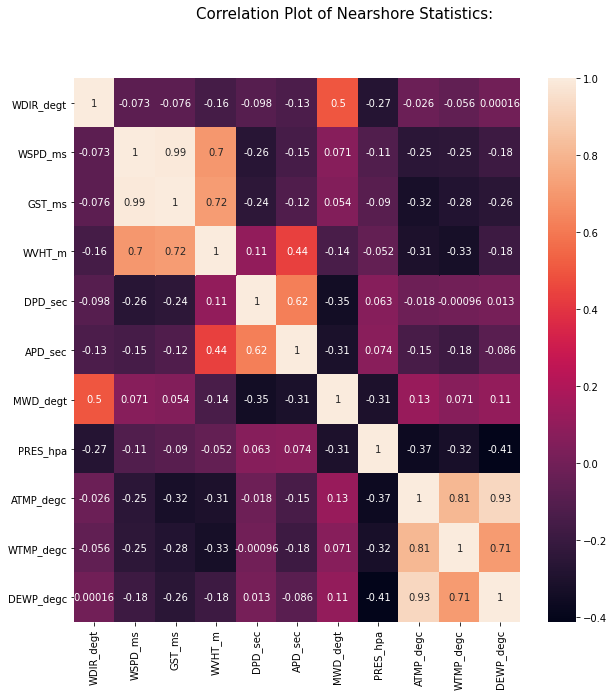

In [5]:
#Correlation matrix of nearshore
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle("Correlation Plot of Nearshore Statistics:", fontsize=15)
corr = nsStats.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)
plt.show()

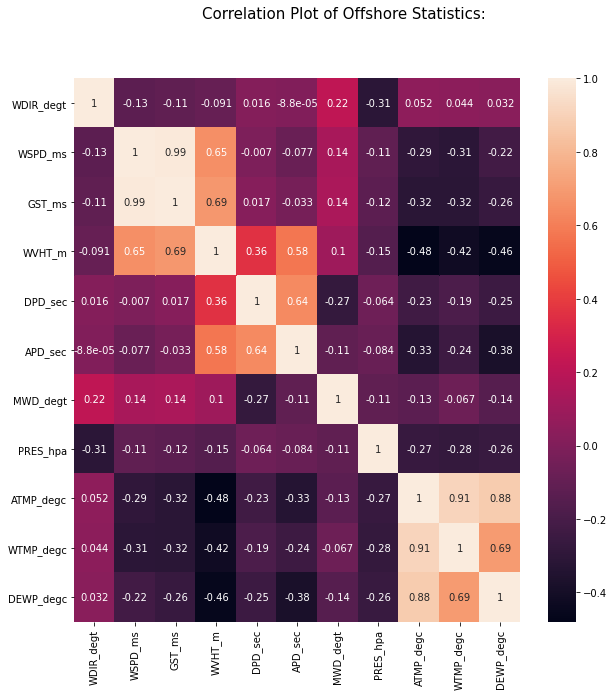

In [6]:
#correlation matrix of offshore
fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle("Correlation Plot of Offshore Statistics:", fontsize=15)
corr = osStats.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
plt.show()

In [7]:
#nearshore wave height statistics
print('Nearshore Wave Height Statistics')
display(nsDf['WVHT_m'].describe())

#offshore wave height statistics
print('Offshore Wave Height Statistics')
display(osDf['WVHT_m'].describe())

Nearshore Wave Height Statistics


count    8737.000000
mean        1.332740
std         0.637057
min         0.270000
25%         0.880000
50%         1.170000
75%         1.620000
max         4.870000
Name: WVHT_m, dtype: float64

Offshore Wave Height Statistics


count    8719.000000
mean        1.625986
std         0.826906
min         0.450000
25%         1.080000
50%         1.430000
75%         1.970000
max         7.560000
Name: WVHT_m, dtype: float64

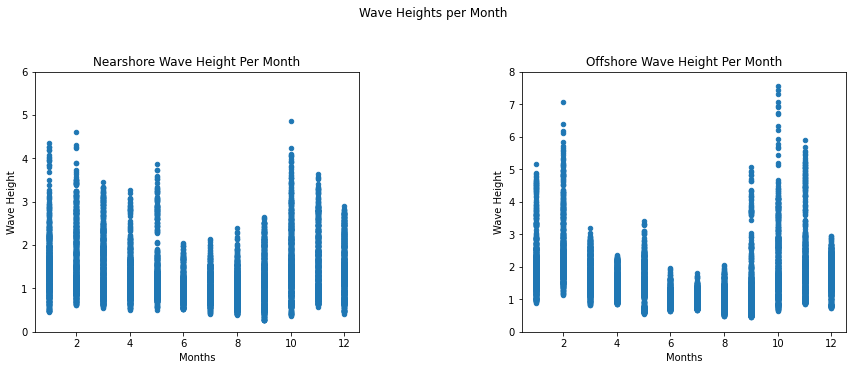

In [8]:
#The wave height for months in the year (nearshore)

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace=.5, top=.8)
plt.suptitle('Wave Heights per Month')

#the wave height for months in the year (nearshore)
nsPlot = nsDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6), ax = ax)
nsPlot.set_title('Nearshore Wave Height Per Month')
nsPlot.set_xlabel('Months')
nsPlot.set_ylabel('Wave Height')

#the wave height for months in the year (offshore)
osPlot = osDf.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,8), ax = ax2)
osPlot.set_title('Offshore Wave Height Per Month')
osPlot.set_xlabel('Months')
osPlot.set_ylabel('Wave Height')
plt.show()

In [9]:
#returns the row(s) of largest wave height in nearshore data
print("Max Wave Height in Nearshore:")
display(nsDf[nsDf['WVHT_m']== nsDf['WVHT_m'].max()])

#returns the row of largest wave height in offshore data
print("Max Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].max()])

#returns the row(s) of smallest wave height in nearshore data ( < 99 )
print("Smallest Wave Height in Offshore:")
display(osDf[osDf['WVHT_m'] == osDf['WVHT_m'].min()])

#returns the row(s) of smallest wave height in nearshore data
print("Smallest Wave(s) Height in Nearshore:")
display(nsDf[nsDf['WVHT_m' ] == nsDf['WVHT_m'].min()])

Max Wave Height in Nearshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6618,2015,10,4,5,50,135.0,10.8,13.1,4.87,10.0,7.76,89.0,999.8,24.7,27.2,23.7


Max Wave Height in Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
6590,2015,10,3,18,50,70.0,19.3,25.0,7.56,9.09,9.0,120.0,986.9,27.1,28.8,23.8


Smallest Wave Height in Offshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5944,2015,9,6,17,50,320.0,0.4,0.9,0.45,8.33,5.77,111.0,1015.4,28.4,30.9,21.9


Smallest Wave(s) Height in Nearshore:


,YY,MM,DD,hh,mm,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
5921,2015,9,5,2,50,37.0,2.5,3.3,0.27,6.25,4.94,115.0,1015.7,27.9,29.2,24.0
5924,2015,9,5,5,50,21.0,1.4,2.1,0.27,11.43,4.97,82.0,1015.1,27.7,29.2,23.0
5925,2015,9,5,6,50,29.0,1.9,2.8,0.27,11.43,5.79,86.0,1014.9,27.6,29.1,23.4
5926,2015,9,5,7,50,8.0,5.4,6.3,0.27,10.81,5.59,84.0,1015.3,27.6,29.0,23.5


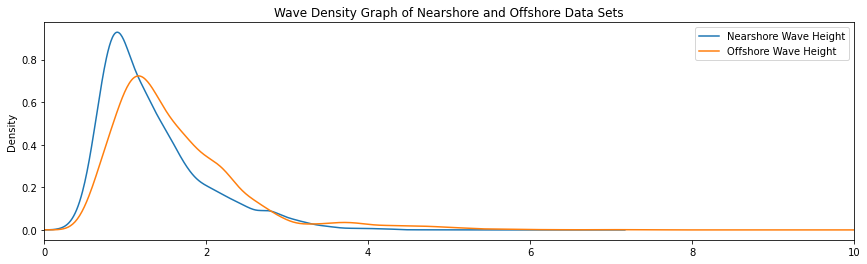

In [10]:
#Density Plot of Wave Heights and Offshore Winds

#extracting wave height from nearshore and offshore data
nsWaveDens = nsDf['WVHT_m']
osWaveDens = osDf['WVHT_m']

#creates plots for each wave height feature
ax = nsWaveDens.plot.kde(label = 'Nearshore Wave Height')
ax = osWaveDens.plot.kde(label = 'Offshore Wave Height')

#adds plot title and legend for density graph
plt.title("Wave Density Graph of Nearshore and Offshore Data Sets")
plt.subplots_adjust(right=2)
plt.xlim((0,10))
plt.legend(loc = "upper right")
plt.show()

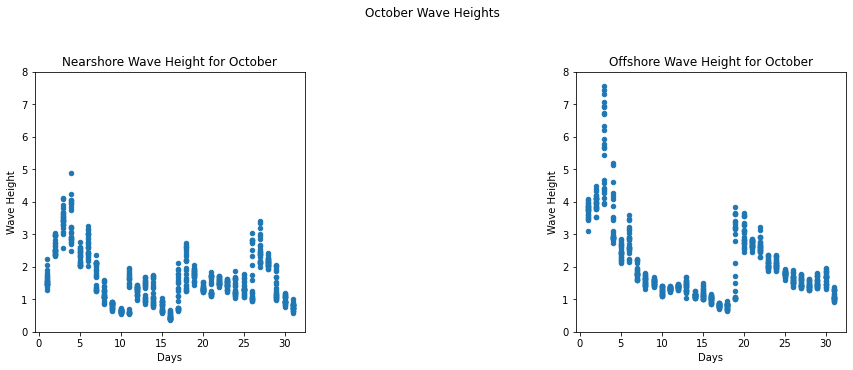

In [11]:
#october scatter plot (wave size was biggest)
nsOct = nsDf[nsDf['MM'] == 10]
osOct = osDf[osDf['MM'] == 10]

#configure graphs for subplots
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1, top=.8)
plt.suptitle('October Wave Heights')

#could possibly find data from extremities in data
nsOctPlot = nsOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax)
nsOctPlot.set_title('Nearshore shore Wave Height in October')
nsOctPlot.set_title('Nearshore Wave Height for October')
nsOctPlot.set_xlabel('Days')
nsOctPlot.set_ylabel('Wave Height')

osOctPlot = osOct.plot(kind='scatter', x='DD', y='WVHT_m',ylim=(0,8), ax = ax2)
osOctPlot.set_title('Nearshore shore Wave Height in October')
osOctPlot.set_title('Offshore Wave Height for October')
osOctPlot.set_xlabel('Days')
osOctPlot.set_ylabel('Wave Height')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

#for clean surf conditions and wave height later
waveNs = nsDf
waveNs.loc[nsDf['WVHT_m'] > 1.2]

#dropping unnecessary columns
cleanNs = nsDf.drop(columns=['YY','MM', 'DD','hh','mm'])
cleanOs = osDf.drop(columns=['YY','MM', 'DD','hh','mm'])

#clean NaNs for PCA
cleanNs = cleanNs.dropna()
cleanOs = cleanOs.dropna()

#change to categorical values
cleanNs['WVHT_m'] = np.where(cleanNs['WVHT_m'] < 2, 'noSurf','surf')
cleanOs['WVHT_m'] = np.where(cleanOs['WVHT_m'] < 2, 'noSurf','surf')

#split data into test and training data sets( only need nearshore since where you surf)
nsTrain, nsTest = train_test_split(cleanNs, test_size=0.33)
#osTrain, osTest = train_test_split(nsDf, test_size=0.33)

#test and train dimensions for good waves
print('Nearshore Test Size: ', nsTest.shape)
print('Nearshore Train Size: ', nsTrain.shape)

Nearshore Test Size:  (2852, 11)
Nearshore Train Size:  (5790, 11)


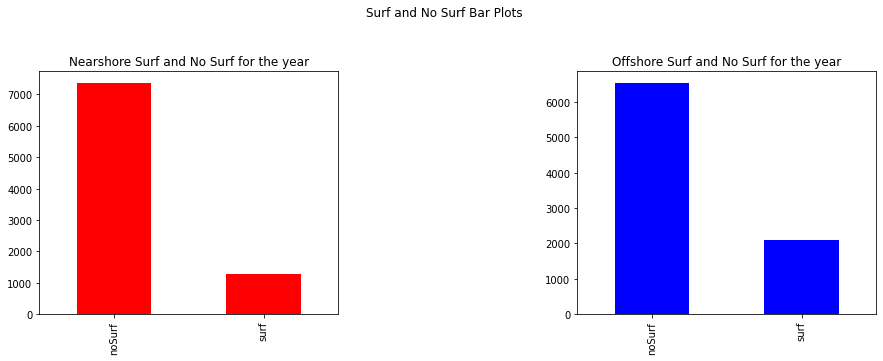

In [13]:
#bar graph for waves above 1.2 meters = surf, and less than 1.2 meters = nosurf

#configure graph position
fig = plt.figure(figsize=(15,5))
fig.suptitle('Surf and No Surf Bar Plots')
plt.subplots_adjust(wspace=.8,top=.8)
fig.tight_layout()

a = fig.add_subplot(1,2,1)
cleanNs['WVHT_m'].value_counts().plot(kind='bar', title='Nearshore Surf and No Surf for the year',color='red')

a = fig.add_subplot(1,2,2)
cleanOs['WVHT_m'].value_counts().plot(kind='bar', title='Offshore Surf and No Surf for the year',color='blue')
plt.show()

In [14]:
#split training data between target and predictor features
nsTrain_x = nsTrain.iloc[:, nsTrain.columns != 'WVHT_m']
nsTrain_y = nsTrain['WVHT_m']

#split testing data between target and predictor features
nsTest_x = nsTest.iloc[:, nsTest.columns != 'WVHT_m']
nsTest_y = nsTest['WVHT_m']

#nsTrain shape
print("nsTrain predictor features shape: ", nsTrain_x.shape)
print("nsTrain target feature shape: ", nsTrain_y.shape)

#nsTest shape
print("nsTest predictor features shape: ", nsTest_x.shape)
print("nsTest target feature shape: ", nsTest_y.shape)

nsTrain predictor features shape:  (5790, 10)
nsTrain target feature shape:  (5790,)
nsTest predictor features shape:  (2852, 10)
nsTest target feature shape:  (2852,)


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

#standardize the data sets
nsTrainX = StandardScaler().fit_transform(nsTrain_x)
#osTrain = StandardScaler().fit_transform(osTrain)

#principle component analysis
pca = decomposition.PCA(n_components=10)
pca.fit(nsTrainX)
trainX = pca.transform(nsTrainX)

print("Output of PCA:")
pd.DataFrame(trainX).head(5)

Output of PCA:


,0,1,2,3,4,5,6,7,8,9
0,-1.648219,-0.854336,0.258873,0.693095,0.377797,0.065764,-0.460673,-0.457229,-0.238640,-0.089688
1,1.115699,2.791760,2.128111,0.622972,2.100124,0.401288,0.015531,1.042343,0.122496,-0.076585
2,-1.026209,-1.038032,-0.238163,-0.337760,0.111344,-0.077762,-0.051294,-0.486434,-0.173553,-0.025484
3,-0.825626,0.942180,-1.658826,-1.689742,0.838503,-0.912192,-0.271009,-0.287270,0.061306,-0.053165
4,-1.978903,0.407231,-1.204087,-1.505094,1.110581,-0.417416,-0.195648,-0.045702,0.146521,0.010622


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#fit the  model to the data
model = DecisionTreeClassifier()
model.fit(nsTrainX, nsTrain_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#predict values
model.predict(trainX)

array(['noSurf', 'surf', 'noSurf', ..., 'surf', 'noSurf', 'noSurf'],
      dtype=object)

In [18]:
from sklearn import metrics

#for training data (100% accuracy)
expected = nsTrain['WVHT_m']
predicted = model.predict(nsTrainX)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

      noSurf       1.00      1.00      1.00      4941
        surf       1.00      1.00      1.00       849

    accuracy                           1.00      5790
   macro avg       1.00      1.00      1.00      5790
weighted avg       1.00      1.00      1.00      5790

[[4941    0]
 [   0  849]]


In [19]:
#standardized data
nsTestX = StandardScaler().fit_transform(nsTest_x)

#principle Component Analysis.
pca = decomposition.PCA(n_components=10)
pca.fit(nsTestX)
testX = pca.transform(nsTestX)

#how well the model predicts on the test set (data not seen yet)
predicted = model.predict(testX)
print(metrics.classification_report(nsTest_y, predicted))
print(metrics.confusion_matrix(nsTest_y, predicted))

              precision    recall  f1-score   support

      noSurf       0.85      0.82      0.83      2437
        surf       0.10      0.12      0.11       415

    accuracy                           0.72      2852
   macro avg       0.47      0.47      0.47      2852
weighted avg       0.74      0.72      0.73      2852

[[1998  439]
 [ 366   49]]


In [20]:
metrics.accuracy_score(nsTest_y,predicted)

0.717741935483871

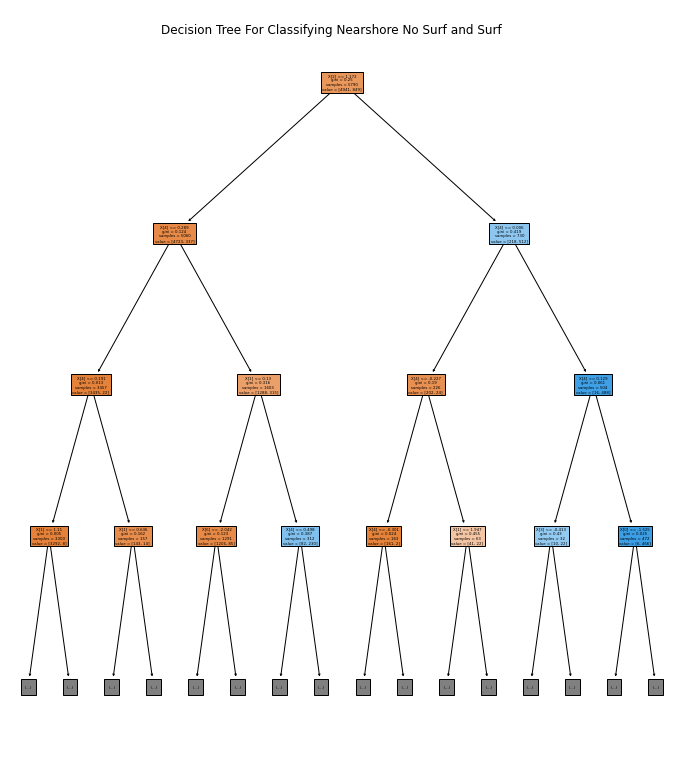

In [21]:
#graph the decision tree
plt.figure(figsize = (12,12))
plt.suptitle("Decision Tree For Classifying Nearshore No Surf and Surf")
plt.subplots_adjust(top=1)
tree.plot_tree(model,filled=True, max_depth=3);
plt.show()

In [22]:
#K means for wave height (to be continued)
from sklearn.cluster import KMeans

kmeansNs = cleanNs[cleanNs['WVHT_m'] == "surf"]

kmeans = KMeans(n_clusters=3).fit(kmeansNs[['MWD_degt']])
centroids = kmeans.cluster_centers_
print(centroids)

#To be continued

[[217.30538922]
 [ 54.96354167]
 [119.58541267]]


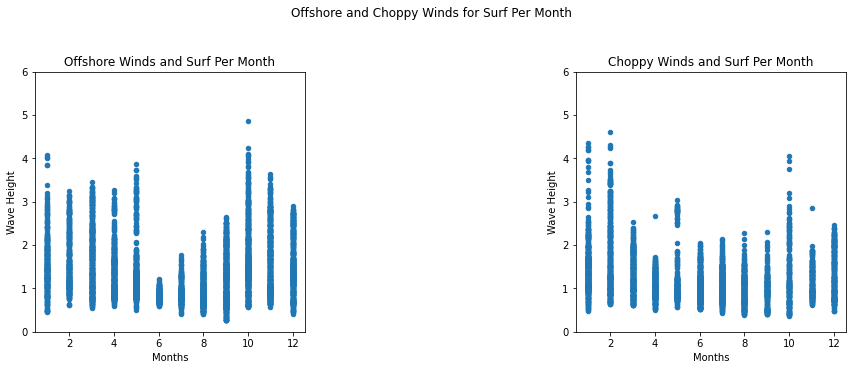

In [23]:
#Wind direction (WSPD_ms) should be Northwest for offshore and over 2 meters wave height

#cleanNs already has 'surf' for waveheight feature
bestDays = waveNs[waveNs['WDIR_degt'] > 170]
bestDays = waveNs[waveNs['WDIR_degt'] < 200]
subparDays = waveNs[waveNs['WDIR_degt'] < 170]
subparDays = waveNs[waveNs['WDIR_degt'] > 200]

#configure graph position
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
ax, ax2 = axes
fig.tight_layout()
plt.subplots_adjust(wspace =1,top=.8)
plt.suptitle('Offshore and Choppy Winds for Surf Per Month ')

#graph showing clean(ish) waves for 2015
surfPlot = bestDays.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6), ax=ax)
surfPlot.set_title('Offshore Winds and Surf Per Month')
surfPlot.set_xlabel('Months')
surfPlot.set_ylabel('Wave Height')

#graph showing choppy waves for 2015
subSurfPlot = subparDays.plot(kind='scatter', x='MM', y='WVHT_m',ylim=(0,6),ax=ax2)
subSurfPlot.set_title('Choppy Winds and Surf Per Month')
subSurfPlot.set_xlabel('Months')
subSurfPlot.set_ylabel('Wave Height')
plt.show()

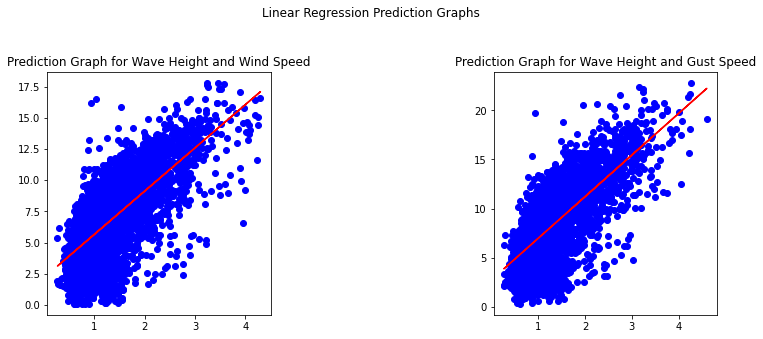

Wave Height and Windspeed Accuracy:  0.4882785385054196
Wave Height and Gust Accuracy:  0.3305924370076966


In [24]:
from sklearn.linear_model import LinearRegression

waveNs.dropna(inplace=True)

#splice column for features to model
wvWsNs = waveNs[['WVHT_m','WSPD_ms']]
wvGsNs = waveNs[['WVHT_m','GST_ms']]

#create arrays of data
waveOneArray = np.array(wvWsNs['WVHT_m']).reshape(-1,1)
windArray = np.array(wvWsNs['WSPD_ms']).reshape(-1,1)

waveTwoArray = np.array(wvGsNs['WVHT_m']).reshape(-1,1)
gustArray = np.array(wvGsNs['GST_ms']).reshape(-1,1)

#split into training and testing data 
xtrain, xtest, ytrain, ytest = train_test_split(waveOneArray,windArray,test_size = .5)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(waveTwoArray,gustArray,test_size = .5)

#fit first model for windspeed and wave height
lm = LinearRegression()
lm.fit(xtrain,ytrain)

#predict xtest for wind and wave height using first model
ypred = lm.predict(xtest)

#fit second model for gust and wave height
lm2 = LinearRegression()
lm2.fit(xtrain2,ytrain2)

#predict xtest2 using model for gust and wave height
ypred2 = lm2.predict(xtest2)

#configure graph position
fig = plt.figure(figsize=(12,5))
fig.suptitle("Linear Regression Prediction Graphs")
plt.subplots_adjust(wspace =1, top=.8)
fig.tight_layout()

#plot the model prediction
a = fig.add_subplot(1,2,1)
plt.title("Prediction Graph for Wave Height and Wind Speed")
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ypred,color='red')

a = fig.add_subplot(1,2,2)
plt.title("Prediction Graph for Wave Height and Gust Speed")
plt.scatter(xtest2,ytest2,color='blue')
plt.plot(xtest2,ypred2,color='red')
plt.show()

#accuracy of linear regression
print("Wave Height and Windspeed Accuracy: ",lm.score(xtest,ytest))
print("Wave Height and Gust Accuracy: ", lm.score(xtest2,ytest2))

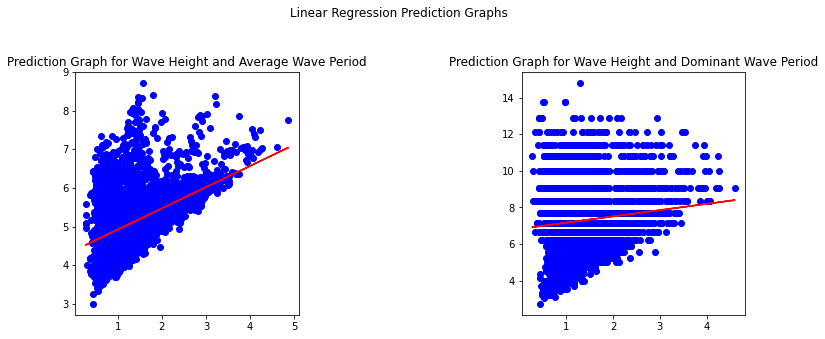

Wave Height and Average Wave Period Accuracy:  0.20385633796148583
Wave Height and Dominant Wave Period Accuracy:  0.00994037737751663


In [25]:
#Linear regression Average Wave Period and Dominant Wave Period 

#splice column for features to model
apdNs = waveNs[['WVHT_m','APD_sec']]
dpdNs = waveNs[['WVHT_m','DPD_sec']]

#create arrays of data
waveOneArray = np.array(apdNs['WVHT_m']).reshape(-1,1)
apdArray = np.array(apdNs['APD_sec']).reshape(-1,1)

waveTwoArray = np.array(dpdNs['WVHT_m']).reshape(-1,1)
dpdArray = np.array(dpdNs['DPD_sec']).reshape(-1,1)

#split into training and testing data 
xtrain, xtest, ytrain, ytest = train_test_split(waveOneArray,apdArray,test_size = .5)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(waveTwoArray,dpdArray,test_size = .5)

#fit first model for APD and wave height
lm = LinearRegression()
lm.fit(xtrain,ytrain)

#predict xtest for APD and wave height using first model
ypred = lm.predict(xtest)

#fit second model for DPD and wave height
lm2 = LinearRegression()
lm2.fit(xtrain2,ytrain2)

#predict xtest2 using model for DPD and wave height
ypred2 = lm2.predict(xtest2)

#configure graph position
fig = plt.figure(figsize=(12,5))
fig.suptitle("Linear Regression Prediction Graphs")
fig.tight_layout()

#plot the model prediction
a = fig.add_subplot(1,2,1)
plt.subplots_adjust(wspace =1, top=.8)
plt.title("Prediction Graph for Wave Height and Average Wave Period")
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ypred,color='red')

a = fig.add_subplot(1,2,2)
plt.title("Prediction Graph for Wave Height and Dominant Wave Period")
plt.scatter(xtest2,ytest2,color='blue')
plt.plot(xtest2,ypred2,color='red')
plt.show()

#accuracy of linear regression (not too accurate)
print("Wave Height and Average Wave Period Accuracy: ",lm.score(xtest,ytest))
print("Wave Height and Dominant Wave Period Accuracy: ", lm2.score(xtest2,ytest2))

In [26]:
#Convert dataframe YY MM DD columns into time series (MUST ONLY RUN ONCE)
timeSeriesNs = nsDf

#convert columns to 2 integer places
nsDf['MM'] = nsDf['MM'].map("{:02}".format)
nsDf['DD'] = nsDf['DD'].map("{:02}".format)
nsDf['hh'] = nsDf['hh'].map("{:02}".format)
nsDf['mm'] = nsDf['mm'].map("{:02}".format)

#change data type to string for TimeSeries Format
nsDf[['YY','MM','DD','hh','mm']] = nsDf[['YY','MM','DD','hh','mm']].astype(str)

#concatenate values YY, MM, hh, mm into TimeSeries column
nsDf['TimeSeries'] = nsDf['YY'].str.cat(nsDf[['MM','DD']].values, sep='-')
nsDf['TimeSeries'] = nsDf['TimeSeries'].str.cat(nsDf['hh'].values, sep=' ')
nsDf['TimeSeries'] = nsDf['TimeSeries'].str.cat(nsDf['mm'].values, sep=':')
nsDf['TimeSeries'] = nsDf['TimeSeries'] + ':00'

#change TimeSeries to front of columns
nsDf['TimeSeries'] = nsDf['TimeSeries'].astype(str)
col = nsDf['TimeSeries']
nsDf.insert(0,col.name,col, allow_duplicates=True)
nsDf = nsDf.iloc[:,:-1]

#change TimeSeries into datetime 64 data type
nsDf['TimeSeries'] = pd.to_datetime(nsDf['TimeSeries'])

#deleting unneccesary columns for data frame
nsDf.drop(['YY','MM','DD','hh','mm'],axis=1, inplace=True, errors='ignore')

#set TimeSeries as index
nsDf = nsDf.set_index('TimeSeries')

#new data set for nearshore (implemented time series)
nsDf.head(3)

#verifying TimeSeries instantiation
print("Time Series Instantiation")
display(nsDf.head(3))
print("Data tyes of Near Shore Data frame")
display(nsDf.dtypes)

Time Series Instantiation


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
TimeSeries,,,,,,,,,,,
2014-12-31 23:50:00,18.0,4.9,7.3,1.25,10.81,5.21,85.0,1027.7,11.3,23.4,3.5
2015-01-01 00:50:00,17.0,5.1,7.2,1.21,6.25,5.09,69.0,1027.9,11.4,23.2,3.3
2015-01-01 01:50:00,2.0,5.0,6.6,1.21,10.81,5.39,76.0,1028.2,11.3,22.9,1.8


Data tyes of Near Shore Data frame


WDIR_degt    float64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt     float64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

In [27]:
#Convert dataframe YY MM DD columns into time series (MUST ONLY RUN ONCE)
timeSeriesOs = osDf

#convert columns to 2 integer places
osDf['MM'] = osDf['MM'].map("{:02}".format)
osDf['DD'] = osDf['DD'].map("{:02}".format)
osDf['hh'] = osDf['hh'].map("{:02}".format)
osDf['mm'] = osDf['mm'].map("{:02}".format)

#change data type to string for TimeSeries Format
osDf[['YY','MM','DD','hh','mm']] = osDf[['YY','MM','DD','hh','mm']].astype(str)

#concatenate values YY, MM, hh, mm into TimeSeries column
osDf['TimeSeries'] = osDf['YY'].str.cat(osDf[['MM','DD']].values, sep='-')
osDf['TimeSeries'] = osDf['TimeSeries'].str.cat(osDf['hh'].values, sep=' ')
osDf['TimeSeries'] = osDf['TimeSeries'].str.cat(osDf['mm'].values, sep=':')
osDf['TimeSeries'] = osDf['TimeSeries'] + ':00'

#change TimeSeries to front of columns
osDf['TimeSeries'] = osDf['TimeSeries'].astype(str)
col = osDf['TimeSeries']
osDf.insert(0,col.name,col, allow_duplicates=True)
osDf = osDf.iloc[:,:-1]

#change TimeSeries into datetime 64 data type
osDf['TimeSeries'] = pd.to_datetime(osDf['TimeSeries'])

#deleting unneccesary columns for data frame
osDf.drop(['YY','MM','DD','hh','mm'],axis=1, inplace=True, errors='ignore')

#set TimeSeries as index
osDf = osDf.set_index('TimeSeries')

#new data set for nearshore (implemented time series)
osDf.head(3)

#verifying TimeSeries instantiation
print("Time Series Instantiation")
display(osDf.head(3))
print("Data tyes of Near Shore Data frame")
display(osDf.dtypes)

Time Series Instantiation


,WDIR_degt,WSPD_ms,GST_ms,WVHT_m,DPD_sec,APD_sec,MWD_degt,PRES_hpa,ATMP_degc,WTMP_degc,DEWP_degc
TimeSeries,,,,,,,,,,,
2014-12-31 23:50:00,97.0,1.8,2.7,1.24,8.33,5.75,4.0,1022.1,23.6,25.4,19.6
2015-01-01 00:50:00,94.0,1.6,2.3,1.29,7.14,5.89,100.0,1022.2,23.8,25.4,19.9
2015-01-01 01:50:00,168.0,0.1,0.4,1.22,8.33,5.96,11.0,1022.4,23.9,25.4,19.6


Data tyes of Near Shore Data frame


WDIR_degt    float64
WSPD_ms      float64
GST_ms       float64
WVHT_m       float64
DPD_sec      float64
APD_sec      float64
MWD_degt     float64
PRES_hpa     float64
ATMP_degc    float64
WTMP_degc    float64
DEWP_degc    float64
dtype: object

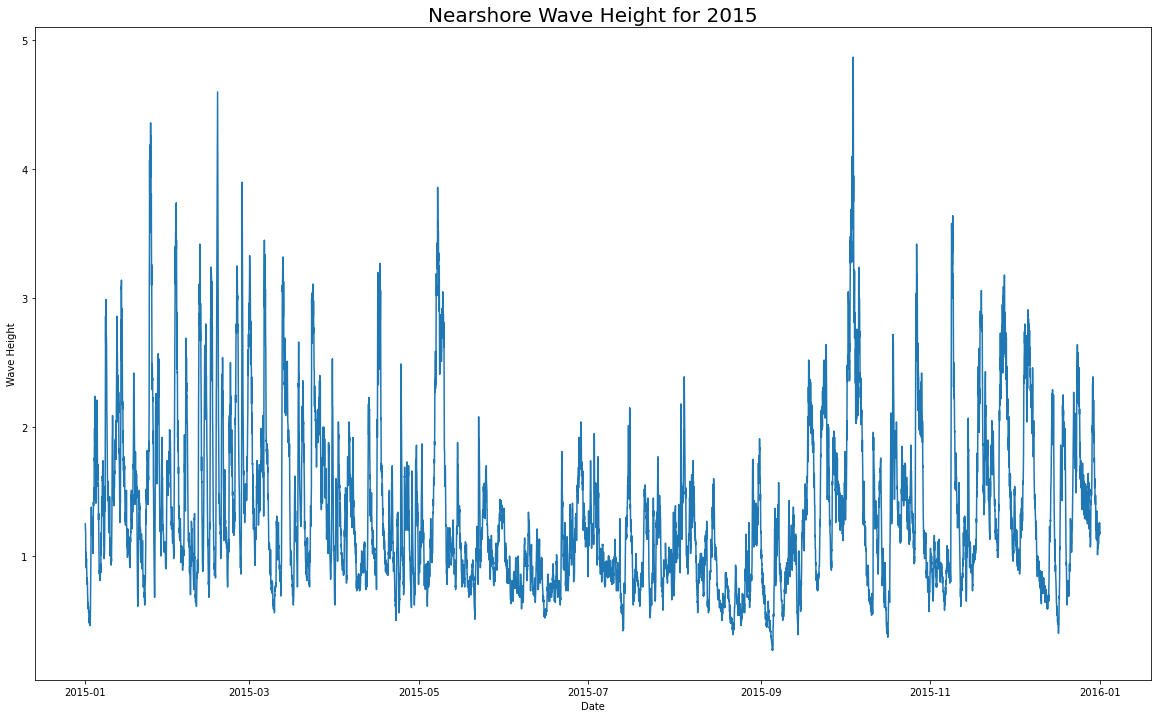

In [28]:
#plots the wave height in Nearshore dataframe for the year 
plt.figure(figsize = (20,12))
plt.title('Nearshore Wave Height for 2015',fontsize=20)
plt.ylabel('Wave Height')
plt.xlabel('Date')
plt.plot(nsDf['WVHT_m'])
plt.show()

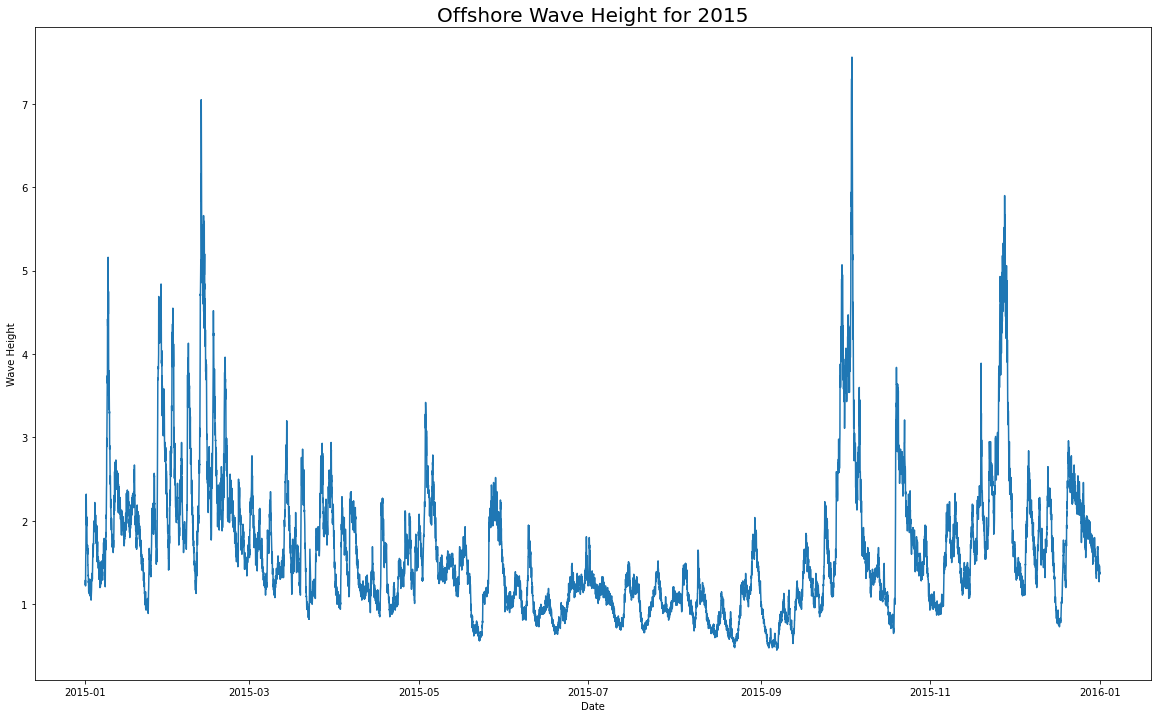

In [29]:
#plots the wave height in Offshore dataframe for the year 
plt.figure(figsize = (20,12))
plt.title('Offshore Wave Height for 2015',fontsize=20)
plt.ylabel('Wave Height')
plt.xlabel('Date')
plt.plot(osDf['WVHT_m'])
plt.show()

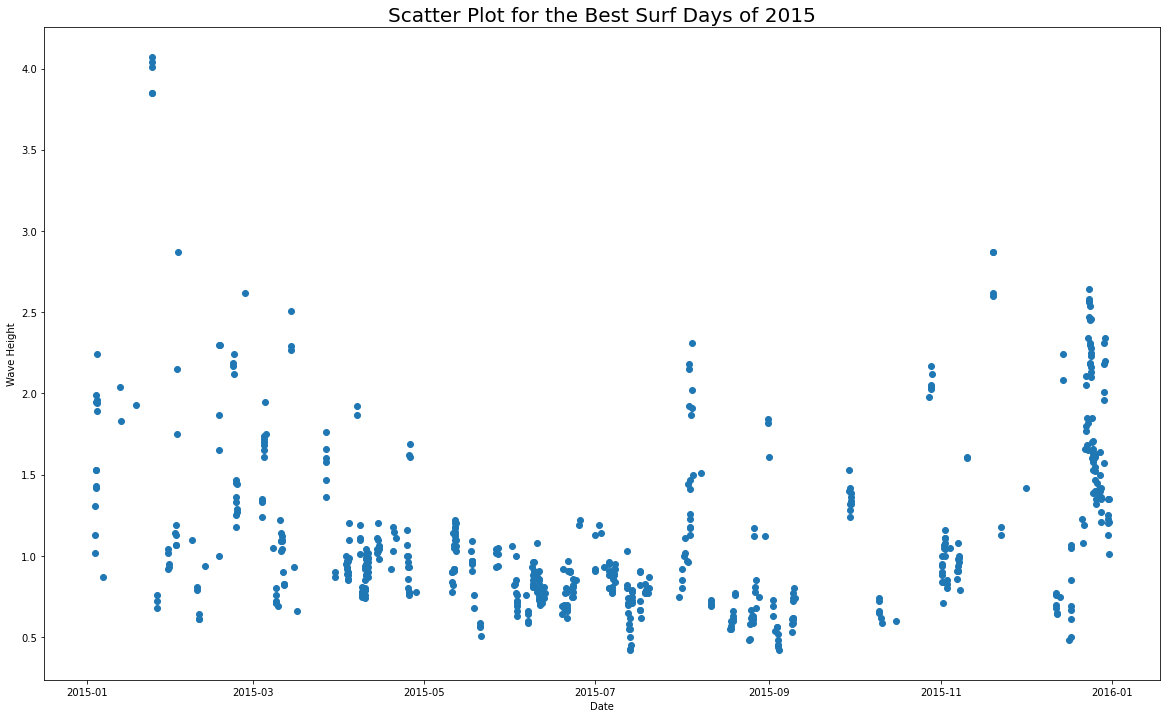

In [30]:
#create dataframe with waves (6 ft) and offshore winds (NW winds)
waveNs = nsDf
waveNs.loc[nsDf['WVHT_m'] > 2]
waveNs = waveNs[waveNs['WDIR_degt'] > 170]
bestDays = waveNs[waveNs['WDIR_degt'] < 200]

#plot the best days
plt.figure(figsize = (20,12))
plt.title('Scatter Plot for the Best Surf Days of 2015',fontsize=20)
plt.ylabel('Wave Height')
plt.xlabel('Date')
plt.scatter(bestDays.index,bestDays['WVHT_m'])
plt.show()

In [31]:
#Predicting the best day for Nearshore (case study)
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


#the best (cleanest and biggest) day in the data set
theBestDay = bestDays[bestDays['WVHT_m'] == bestDays['WVHT_m'].max()]
bestTime = theBestDay.index
biggestHeight = theBestDay['WVHT_m']
print(bestTime)
print(biggestHeight)

#splicing the data for incoming swell
incomingSwellNs = nsDf.loc['2015-01-22 02:50:00':'2015-01-24 02:50:00']
incomingSwellOs = osDf.loc['2015-01-22 02:50:00':'2015-01-24 02:50:00']

DatetimeIndex(['2015-01-24 02:50:00'], dtype='datetime64[ns]', name='TimeSeries', freq=None)
TimeSeries
2015-01-24 02:50:00    4.07
Name: WVHT_m, dtype: float64


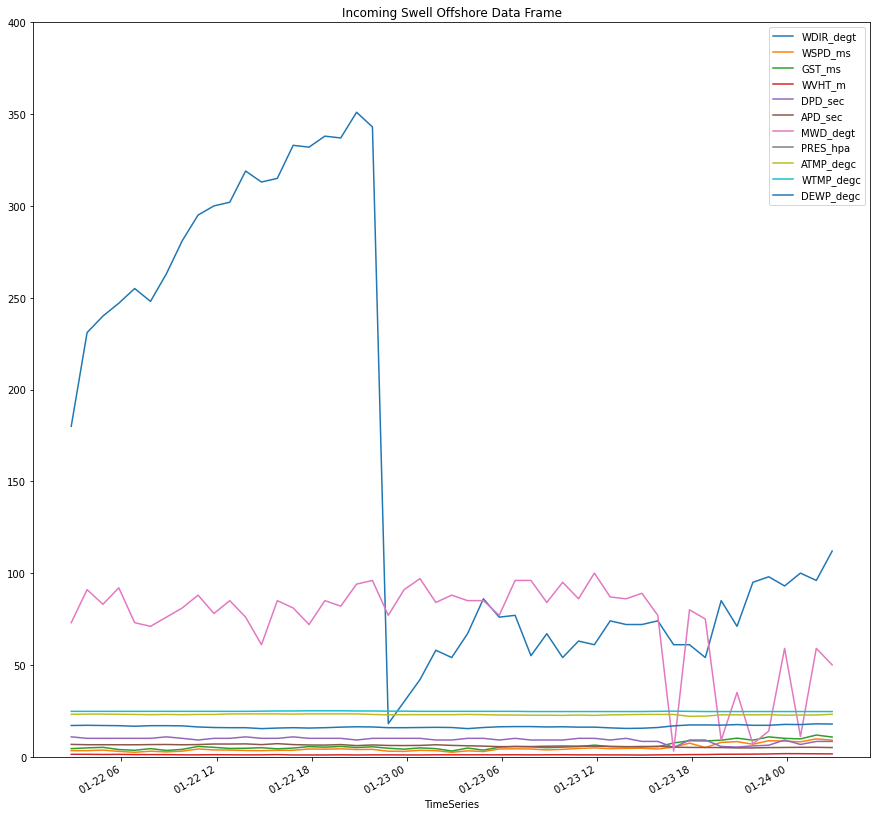

The best and Cleanest Day:
 DatetimeIndex(['2015-01-24 02:50:00'], dtype='datetime64[ns]', name='TimeSeries', freq=None)


In [32]:
#Figure Layout of incoming swell offshore

#plot incoming swell from offshore
incomingSwellOs.plot(ylim=(0,400),figsize=(15,15),title="Incoming Swell Offshore Data Frame")
plt.legend()
plt.show()
bestTime = theBestDay.index
print("The best and Cleanest Day:\n",bestTime)

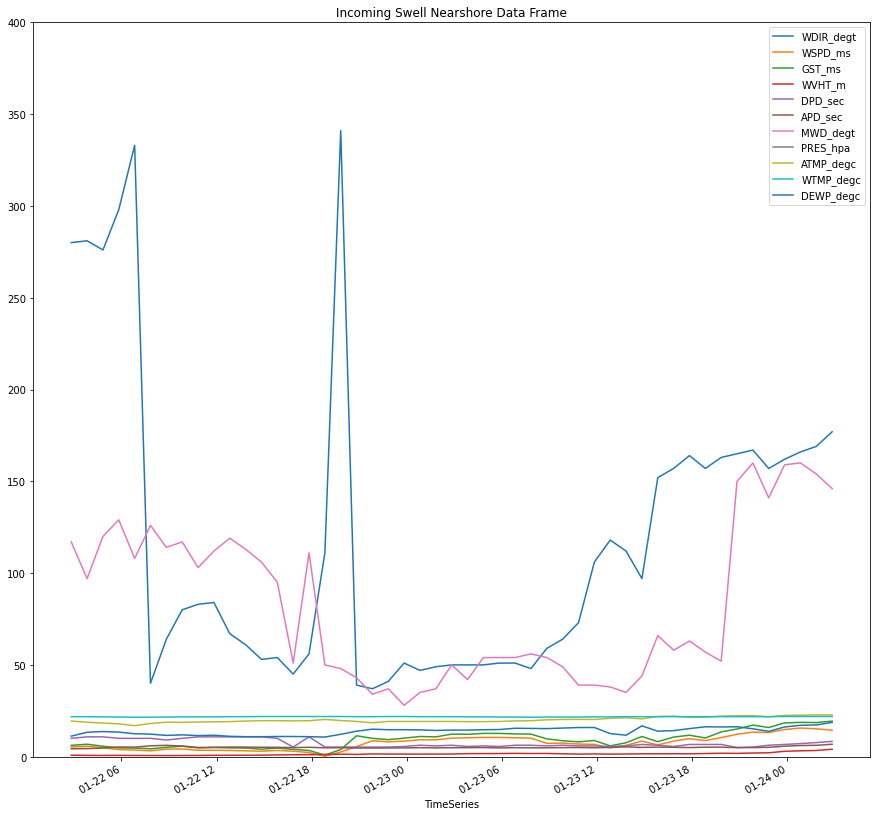

The best and Cleanest Day:
 DatetimeIndex(['2015-01-24 02:50:00'], dtype='datetime64[ns]', name='TimeSeries', freq=None)


In [33]:
#Figure Layout of incoming swell Nearshore

#plot incoming swell from nearshore
incomingSwellNs.plot(ylim=(0,400),figsize=(15,15),title="Incoming Swell Nearshore Data Frame")
plt.legend()
plt.show()
bestTime = theBestDay.index
print("The best and Cleanest Day:\n",bestTime)

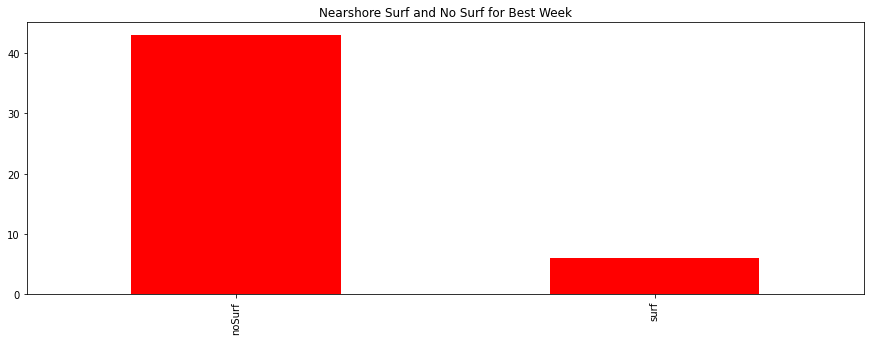

In [34]:
#Bar graph for waves above 2 meters = surf, and less than 2 meters = nosurf in case study

#configure graph position
fig = plt.figure(figsize=(15,5))
fig.tight_layout()

#changing incoming surf to categorical
incomingSwellNsSurf = incomingSwellNs
incomingSwellNsSurf = incomingSwellNsSurf.dropna()
incomingSwellNsSurf['WVHT_m'] = np.where(incomingSwellNs['WVHT_m'] < 2, 'noSurf','surf')

#plot the values of surf and nosurf
incomingSwellNsSurf['WVHT_m'].value_counts().plot(kind='bar', title='Nearshore Surf and No Surf for Best Week',color='red')
plt.show()

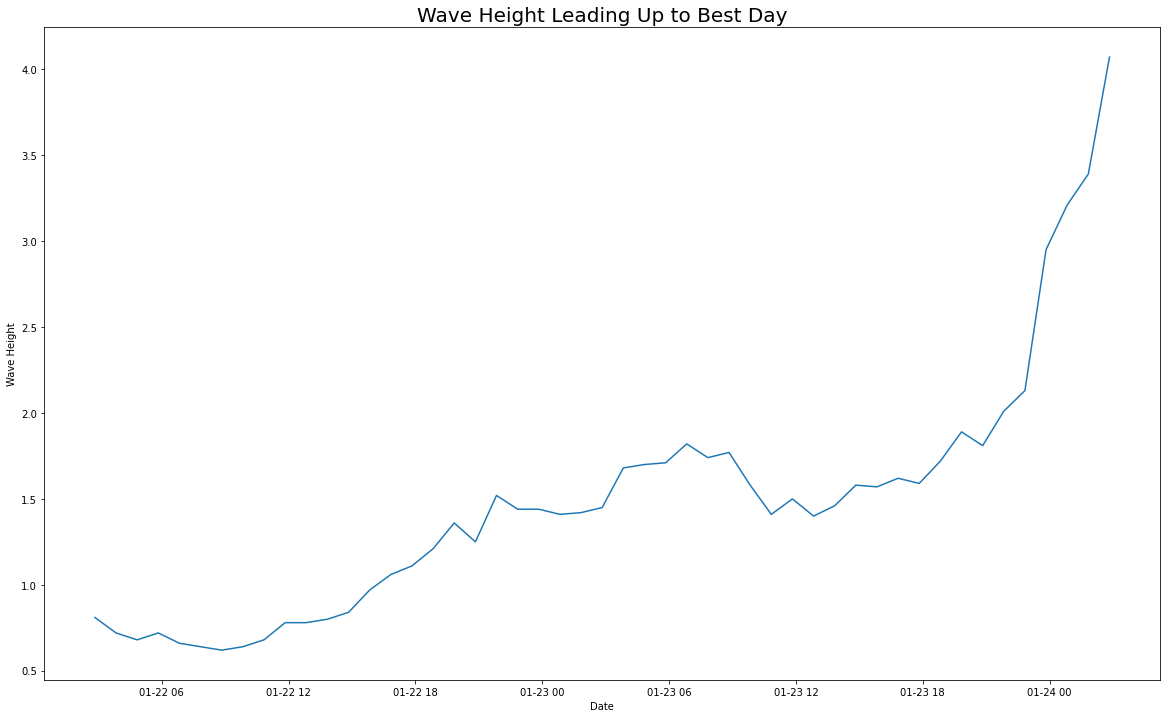

				Insight: Waves didn't peak till 1-23-15 Afternoon
Incoming Swell Wave Stats


count    49.000000
mean      1.475918
std       0.726217
min       0.620000
25%       0.840000
50%       1.440000
75%       1.710000
max       4.070000
Name: WVHT_m, dtype: float64

In [35]:
#plots the wave height in Offshore dataframe for the year 
plt.figure(figsize = (20,12))
plt.title('Wave Height Leading Up to Best Day',fontsize=20)
plt.ylabel('Wave Height')
plt.xlabel('Date')
plt.plot(incomingSwellNs['WVHT_m'])
plt.show()
print("\t\t\t\tInsight: Waves didn't peak till 1-23-15 Afternoon")
print("Incoming Swell Wave Stats")
incomingSwellNs['WVHT_m'].describe()

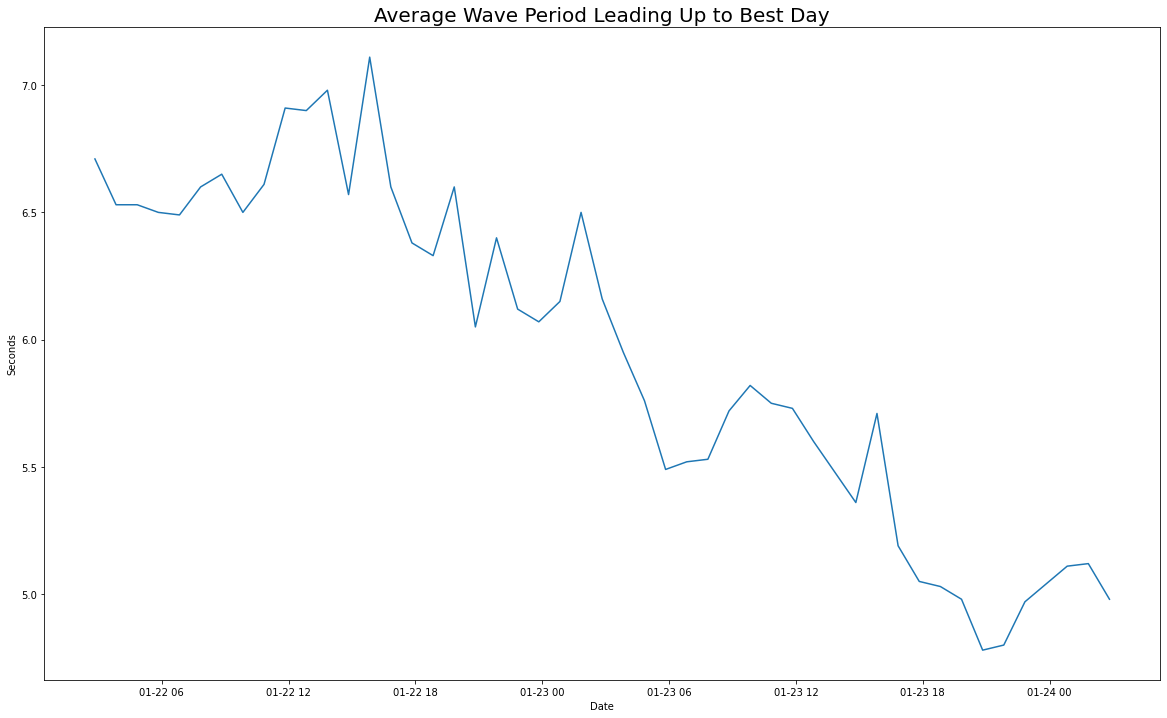

			Insight: Average Wave Period spiked then Declined
Incoming Swell Wave Stats


count    49.000000
mean      5.128776
std       0.468467
min       4.320000
25%       4.870000
50%       5.000000
75%       5.210000
max       6.780000
Name: APD_sec, dtype: float64

In [36]:
#Average Wave Period in seconds with maximum wave energy (offshore)

#went North and then East
plt.figure(figsize = (20,12))
plt.title('Average Wave Period Leading Up to Best Day',fontsize=20)
plt.ylabel('Seconds')
plt.xlabel('Date')
plt.plot(incomingSwellOs['APD_sec'])
plt.show()
print("\t\t\tInsight: Average Wave Period spiked then Declined")
print("Incoming Swell Wave Stats")
incomingSwellNs['APD_sec'].describe()

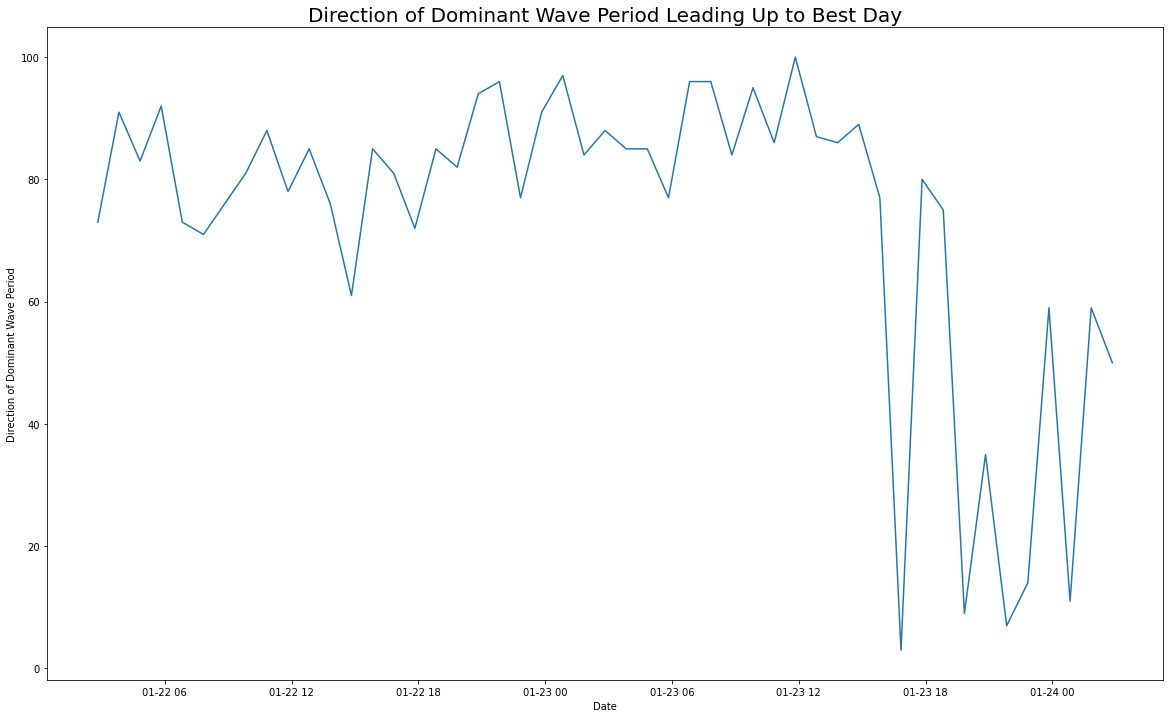

				Insight: Direction started East then North Before

Direction of Dominant Wave Period Stats


count     49.000000
mean      82.122449
std       42.419842
min       28.000000
25%       48.000000
50%       58.000000
75%      117.000000
max      160.000000
Name: MWD_degt, dtype: float64

In [37]:
#Dominant Wave Period Direction (North Eastern Swell)

#went North and then East
plt.figure(figsize = (20,12))
plt.title('Direction of Dominant Wave Period Leading Up to Best Day',fontsize=20)
plt.ylabel('Direction of Dominant Wave Period')
plt.xlabel('Date')
plt.plot(incomingSwellOs['MWD_degt'])
plt.show()
print("\t\t\t\tInsight: Direction started East then North Before")
print("\nDirection of Dominant Wave Period Stats")
incomingSwellNs['MWD_degt'].describe()

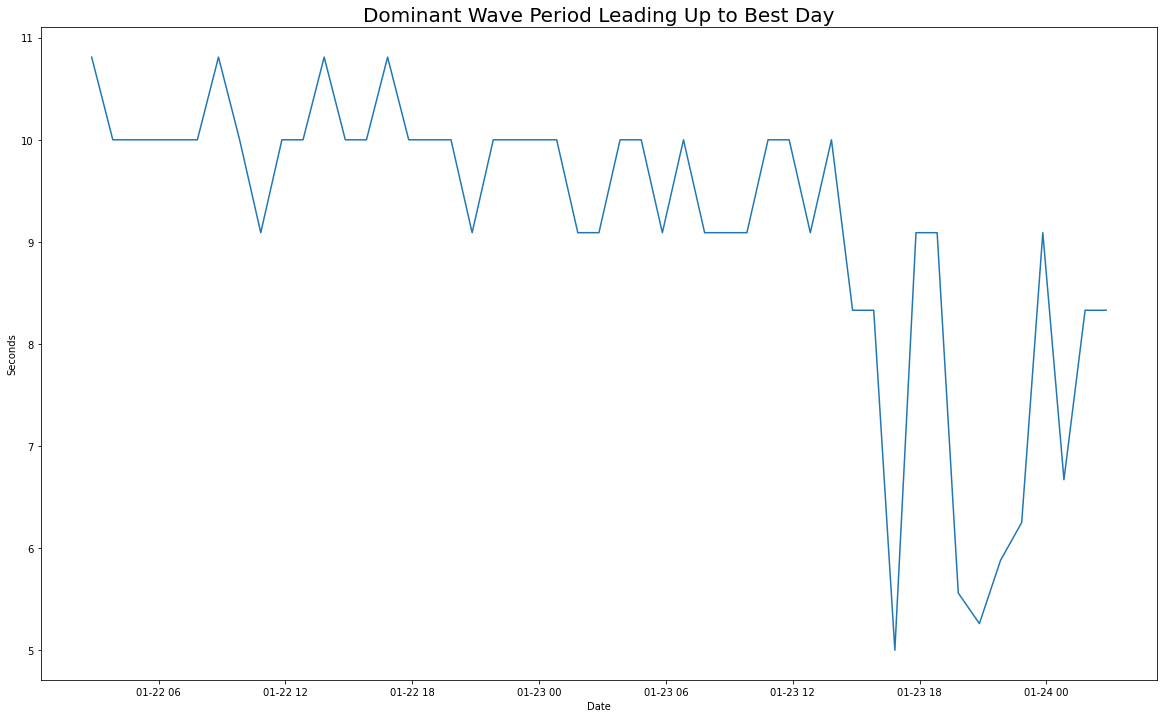

			Insight: Dominant Wave Period was above 9 seconds then dropped off
Dominant Wave Period Stats


count    49.000000
mean      7.361837
std       2.130707
min       5.000000
25%       5.560000
50%       6.250000
75%      10.000000
max      10.810000
Name: DPD_sec, dtype: float64

In [38]:
#went North and then East
plt.figure(figsize = (20,12))
plt.title('Dominant Wave Period Leading Up to Best Day',fontsize=20)
plt.ylabel('Seconds')
plt.xlabel('Date')
plt.plot(incomingSwellOs['DPD_sec'])
plt.show()
print("\t\t\tInsight: Dominant Wave Period was above 9 seconds then dropped off")
print("Dominant Wave Period Stats")
incomingSwellNs['DPD_sec'].describe()

# <span style="color:red">  Data Analysis Insights   </span>

## <span style="color:blue">  Data Analysis (positive correlations) used Correlation Plots   </span>

### Wave Height and Windspeed, Gust, Average Wave Period

## <span style="color:blue">  Data Analysis from Scatter plots   </span>

### October, November, January, and February had the most waves.

### October had the most waves of the year starting in the beginning and the end of the month.

## <span style="color:blue">  Data Analysis from Density plot   </span>

### Nearshore and Offshore wave height density both skewed right (positive skewedness).

### Nearshore had a more dense curve then Offshore.

## <span style="color:blue">  Data Analysis from Decision Tree Classifying Wave Height  </span>

### The model was implemented by extracting wave height over 1.2 meters classified by surf and under 1.2 meters No Surf.

### The model accuracy on the test set was 76%, which could mean it may be overfit.

## <span style="color:blue">  Data Analysis from Linear regression  </span>

### Wave Height and Windspeed had positive linear correlation with 47% accuracy on test set.

### Wave Height and Gust had positive linear correlation with 33% accuracy on test set.

### Wave Height and Average Wave Period had 19% accuracy.

### Wave Height and Dominant Wave Period had less than 1% accuracy (could be an error).

## <span style="color:blue">  Case Study of the Forecast for Day with Biggest and Cleansest Waves   </span>

### The day of the best wave's height increased more than double within a day.

### Offshore Average Wave Period was above 7 seconds 2 days before then dropped off to 3 seconds before the best day.

### Offshore Dominant Wave Period was above 9 seconds the past 2 days before dropping off then spiking back to 9 seconds again.

### The Dominant Wave Period direction started off East then switching North before the best day.


## <span style="color:red">  Conclusion  </span>

### In conclusion, the forecast model was constantly changing upon creation. Finding the csv data with little errors then cleaning the data made for a large task itself. While some of the data analysis can seem overfit, the analysis does provide some useful insights. In the future, missing features  will be added include hurricane data and a verification of wave quality using previous surf reports. 